### Project Description:

The purpose of the case study is to classify a given silhouette as one of three different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double-decker bus, Chevrolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

## 1.Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [453]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [454]:
vehicle = pd.read_csv('vehicle.csv')
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [455]:
vehicle.shape

(846, 19)

#### dataset has 846 records and 19 columns. From the Project Description, class column looks like target column for classification and rest 18 relects features of vehicles.

In [456]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### From output above, all features are numeric types and class variable which is target seems to be categorical type variable

In [457]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### Dataset has null values in all feature columns except compactness, max.length_aspect_ratio, max.length_rectangularity, hollows_ratio

In [458]:
# Number of rows which will be dropped on dropping rows with null values.
drop_percentage = (vehicle.shape[0] - vehicle.dropna().shape[0])/vehicle.shape[0] * 100
print(drop_percentage)

3.900709219858156


#### Dropping rows with missing values would reduce the dataset records by around 4% which is not significant, so these can be dropped.

In [459]:
vehicle.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [460]:
vehicle.dropna(inplace = True)

In [461]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [462]:
vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

##### Separating feature columns from target column for feature analysis

In [463]:
#Separated feature columns for analysis
vehicleX = vehicle.drop('class',axis=1)

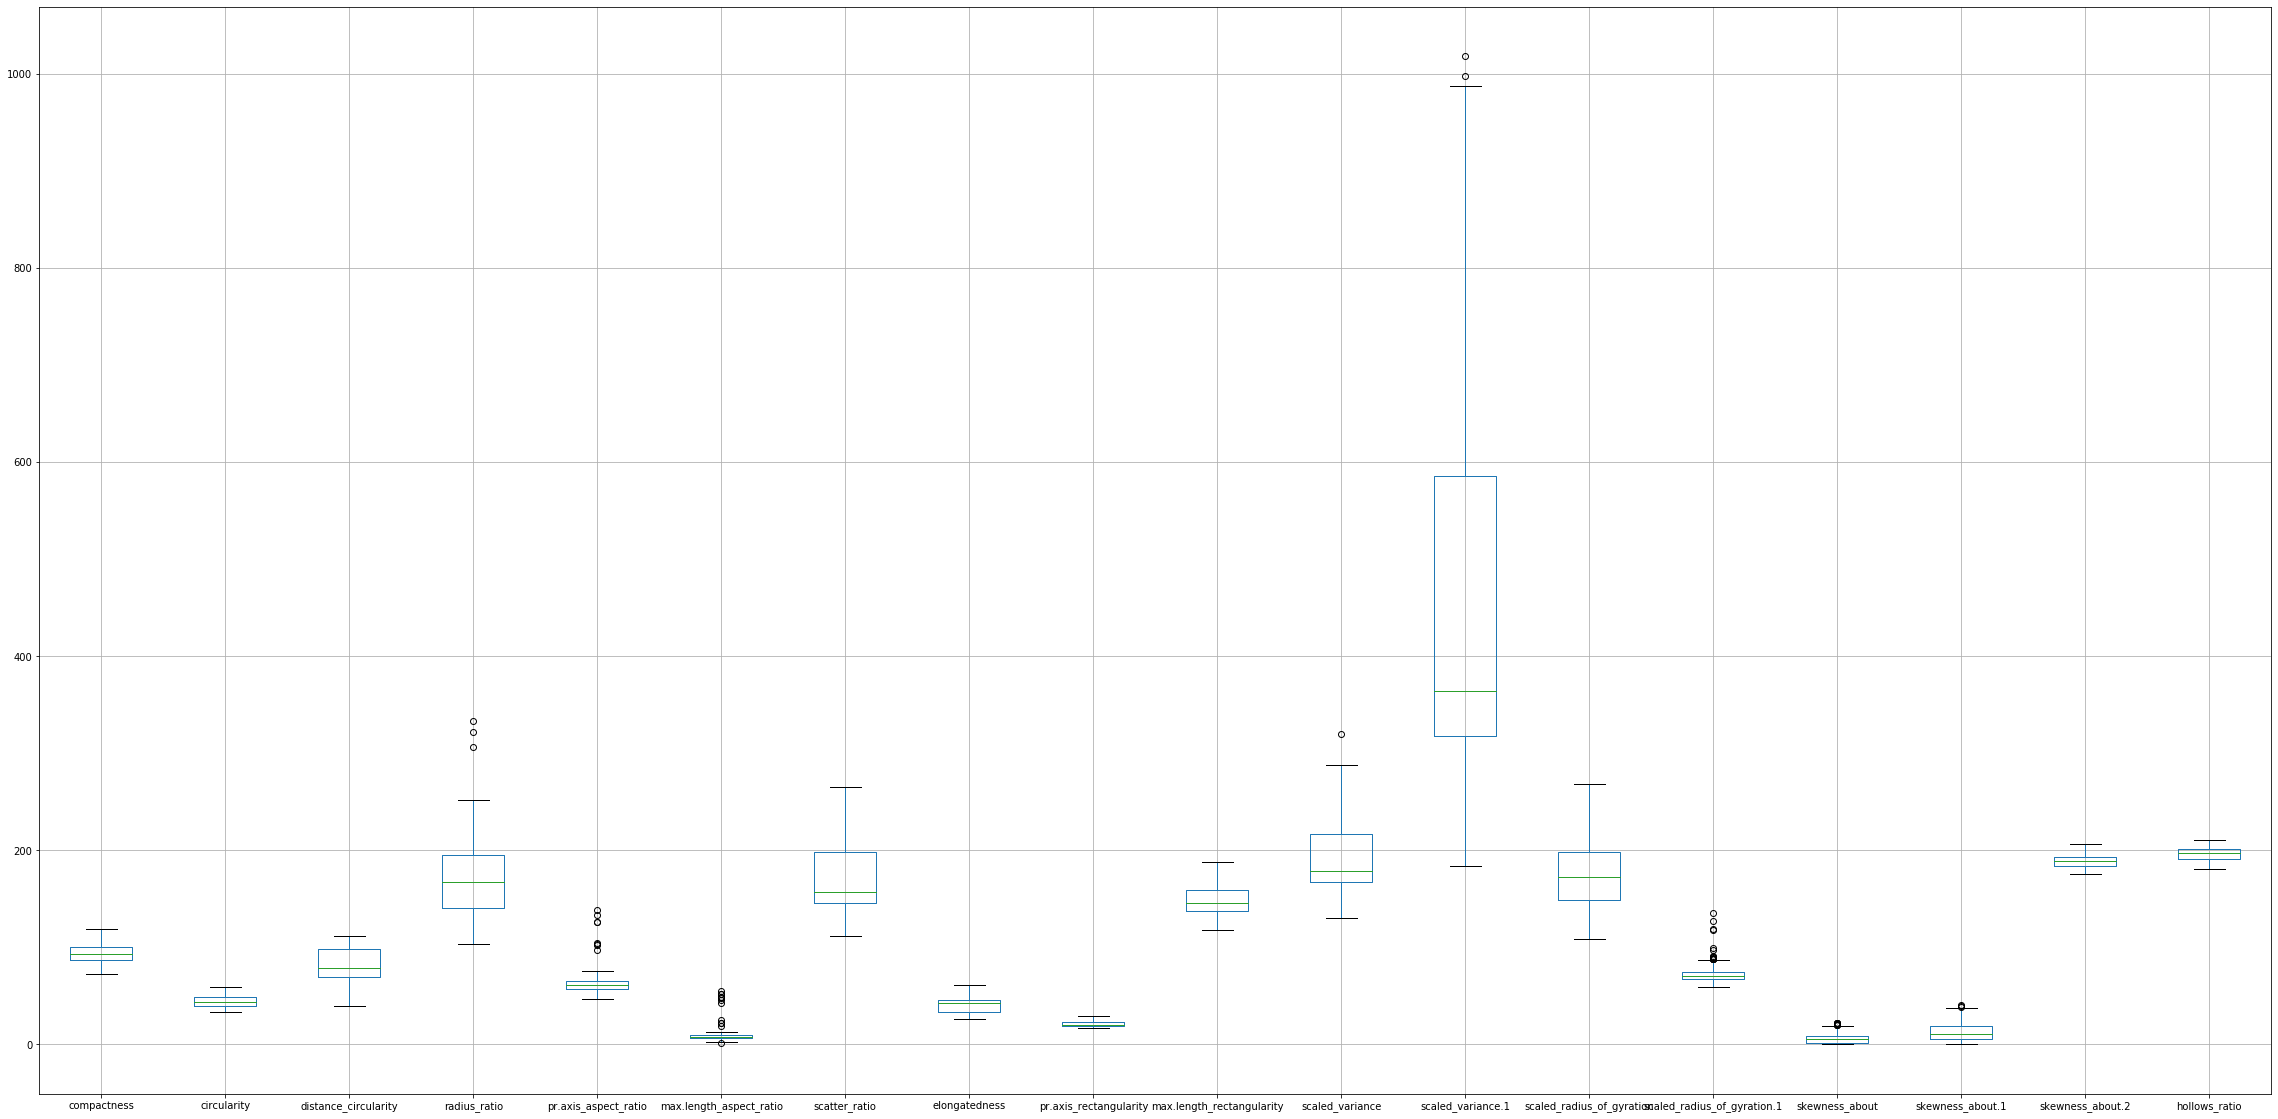

In [464]:
vehicleX.boxplot(figsize = (40,20))

#### Detection, Counting, Imputation of outliers
#### From the box plot above, outliers can be seen for different features.
#### Counting outliers for different features and imputing outliers for different features with upper_limit for outliers lying beyond upper_limit or with lower_limit for outliers lying below lower limit.

In [465]:
Q1 = vehicleX.quantile(0.25)
Q3 = vehicleX.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print('Upper limit for each feature outliers: ')
print(upper_limit)
print('Lower limit for each feature outliers: ')
print(lower_limit)
outliers = ((vehicleX < lower_limit) | (vehicleX > upper_limit)).sum()
print('Number of outliers for each features: ')
print(outliers)

Upper limit for each feature outliers: 
compactness                    119.5
circularity                     62.5
distance_circularity           140.0
radius_ratio                   276.0
pr.axis_aspect_ratio            77.0
max.length_aspect_ratio         14.5
scatter_ratio                  276.0
elongatedness                   65.5
pr.axis_rectangularity          29.0
max.length_rectangularity      192.0
scaled_variance                292.0
scaled_variance.1              988.0
scaled_radius_of_gyration      271.5
scaled_radius_of_gyration.1     87.0
skewness_about                  19.5
skewness_about.1                38.5
skewness_about.2               206.5
hollows_ratio                  216.0
dtype: float64
Lower limit for each feature outliers: 
compactness                     67.5
circularity                     26.5
distance_circularity            28.0
radius_ratio                    60.0
pr.axis_aspect_ratio            45.0
max.length_aspect_ratio          2.5
scatter_ratio    

#### Imputing outliers with upper and lower limits as applicable in below code. Print statements have been added for analysis before and after imputation.Commented for better readability.

In [466]:
#Imputing outliers
for i in range(len(vehicleX.columns)):
    if outliers[vehicleX.columns[i]] != 0:
        #print(vehicleX.columns[i] + ' before outliers imputation: ')
        #print(pd.crosstab(vehicleX[vehicleX.columns[i]],vehicle['class']))
        vehicleX[vehicleX.columns[i]] = np.where(vehicleX[vehicleX.columns[i]] > upper_limit[vehicleX.columns[i]],int(upper_limit[vehicleX.columns[i]]),vehicleX[vehicleX.columns[i]])
        vehicleX[vehicleX.columns[i]] = np.where(vehicleX[vehicleX.columns[i]] < lower_limit[vehicleX.columns[i]],int(lower_limit[vehicleX.columns[i]] + 1),vehicleX[vehicleX.columns[i]])
        #print(vehicleX.columns[i] + ' after outliers imputation: ')
        #print(pd.crosstab(vehicleX[vehicleX.columns[i]],vehicle['class']))

### Box Plot after outlier processing where it is clearly seen that outliers have been imputed properly. These can be analysed and confirmed how the outliers have been imputed from the above code when it is run with print statements uncommented.

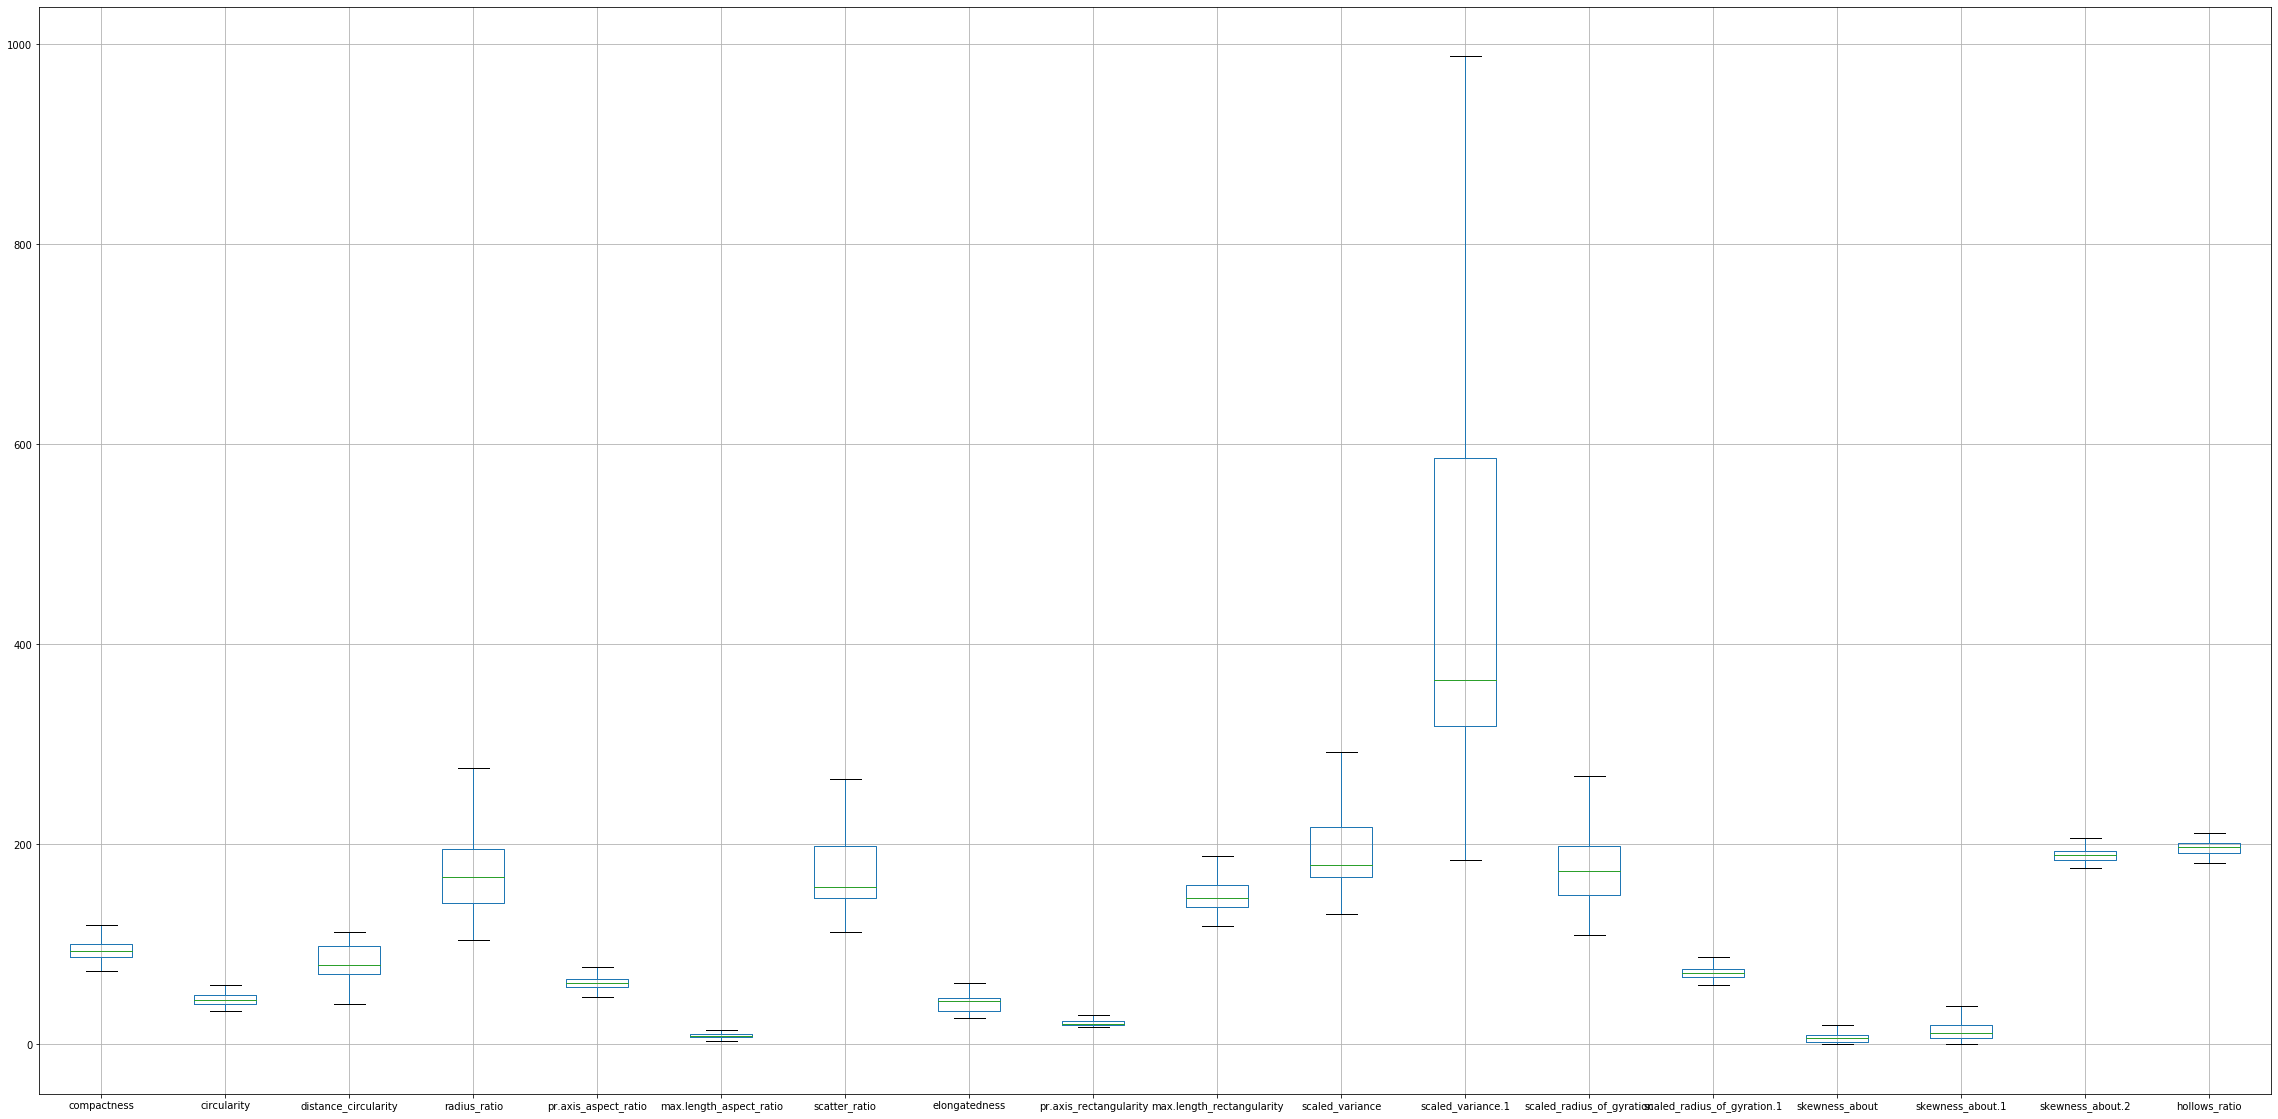

In [467]:
vehicleX.boxplot(figsize = (40,20))

## 2.Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [468]:
vehicleX.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

#### Finding correlation between different features and plotting correlation heatmap for better visualization

In [469]:
corr = vehicleX.corr()
corr

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.702912,0.167676,0.455731,0.814026,-0.788051,0.814227,0.674902,0.767552,0.820397,0.581405,-0.274931,0.228268,0.168379,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.634144,0.200286,0.534245,0.858149,-0.825108,0.856137,0.965366,0.809099,0.851096,0.935594,0.053267,0.142011,-0.001534,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.785644,0.236747,0.626975,0.909023,-0.912713,0.897261,0.773459,0.869113,0.892180,0.705689,-0.263222,0.109305,0.278012,0.145258,0.343228
radius_ratio,0.702912,0.634144,0.785644,1.000000,0.686134,0.500486,0.759899,-0.812683,0.732499,0.578129,0.808053,0.748931,0.553418,-0.328101,0.044457,0.181995,0.385359,0.480652
pr.axis_aspect_ratio,0.167676,0.200286,0.236747,0.686134,1.000000,0.222080,0.188267,-0.288500,0.154253,0.158370,0.259671,0.174951,0.166516,-0.231624,-0.058372,-0.038294,0.358833,0.379987
max.length_aspect_ratio,0.455731,0.534245,0.626975,0.500486,0.222080,1.000000,0.462054,-0.474647,0.459732,0.625130,0.437463,0.425349,0.394257,-0.261700,0.089590,0.130001,0.053219,0.375227
scatter_ratio,0.814026,0.858149,0.909023,0.759899,0.188267,0.462054,1.000000,-0.973413,0.991992,0.808154,0.954516,0.996483,0.795748,-0.033193,0.069268,0.227624,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.812683,-0.288500,-0.474647,-0.973413,1.000000,-0.950345,-0.771099,-0.942073,-0.957181,-0.761563,0.121895,-0.046265,-0.201451,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.732499,0.154253,0.459732,0.991992,-0.950345,1.000000,0.811979,0.940258,0.992119,0.792895,-0.016989,0.077744,0.231383,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.578129,0.158370,0.625130,0.808154,-0.771099,0.811979,1.000000,0.747346,0.796457,0.865240,0.031877,0.130715,0.013500,-0.108019,0.086792


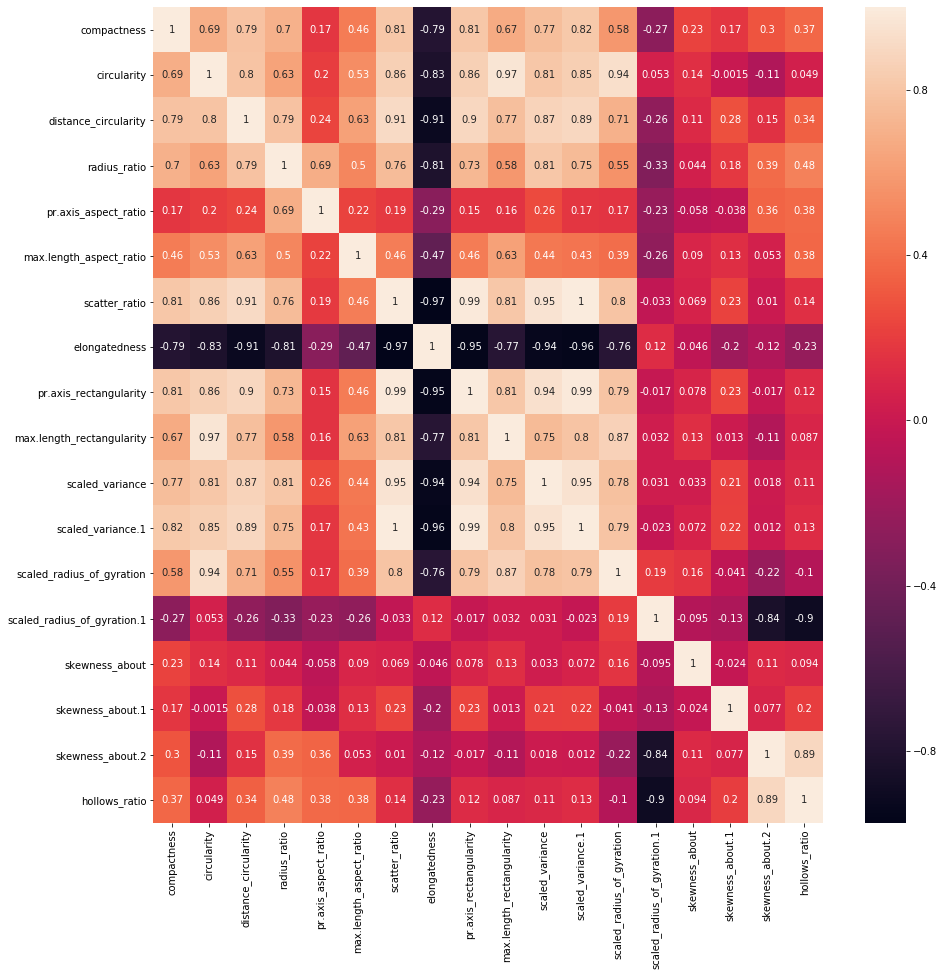

In [470]:
plt.subplots(figsize=(15,15))
sns.heatmap(vehicleX.corr(), annot=True)

#### From the above correlation matrix and correlation plot, it seems there are features which are highly correlated. These features with correlation higher than 0.9 can be removed as those features would have same effect on the target variable.

#### Also In the end, finding set of feature selections based on correlation higher than 0.7 for comparative analysis on accuracy.

In [471]:
columns1 = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns1[j]:
                columns1[j] = False
                
selected_features1 = vehicleX.columns[columns1]
removed_features1 = vehicleX.columns[columns1 == False]
vehicleX1 = vehicleX[selected_features1]
vehicleX1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,elongatedness,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,42.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,45.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,32.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,46.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,77.0,14,45.0,87.0,9.0,11.0,180.0,183


In [472]:
print('Shape of dataset with feature selection based on correlation value greater than 0.9: ')
print(vehicleX1.shape)
print('Features selected based on correlation value greater than 0.9: ')
print(selected_features1)
print('Features removed based on correlation value greater than 0.9: ')
print(removed_features1)

Shape of dataset with feature selection based on correlation value greater than 0.9: 
(813, 12)
Features selected based on correlation value greater than 0.9: 
Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'elongatedness',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')
Features removed based on correlation value greater than 0.9: 
Index(['scatter_ratio', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'],
      dtype='object')


#### Recheck correlation heatmap after feature selection

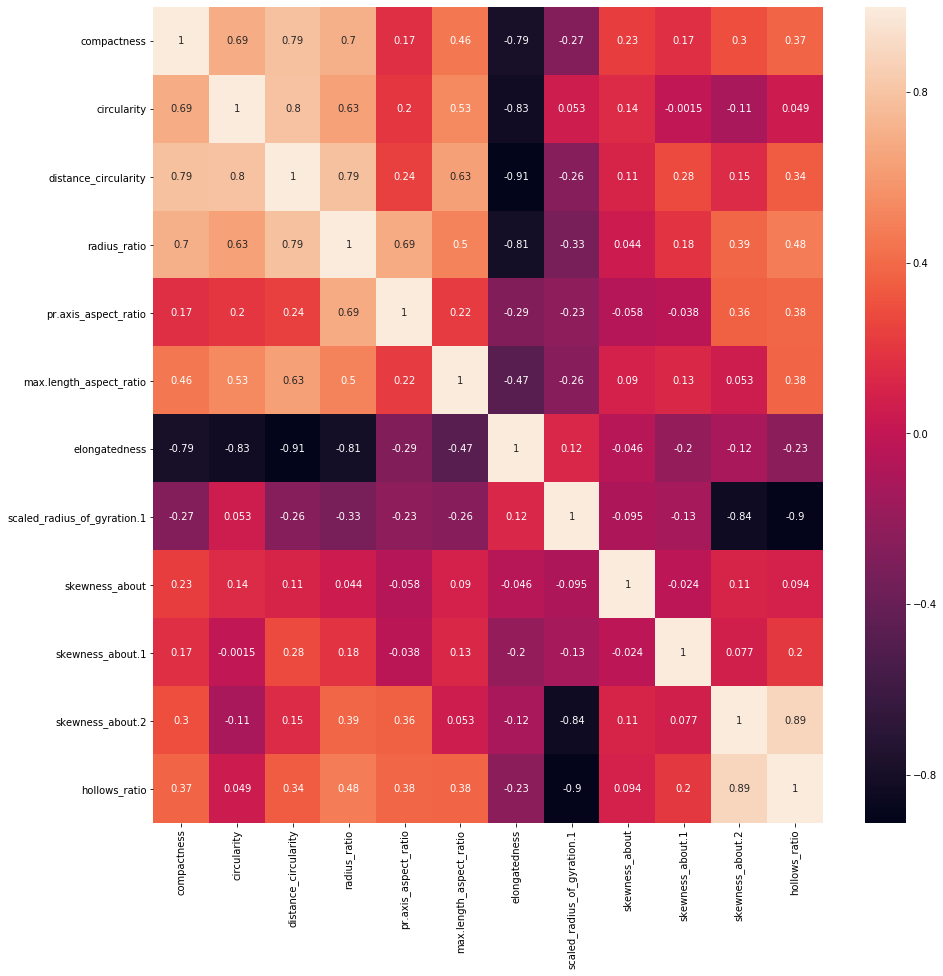

In [473]:
plt.subplots(figsize=(15,15))
sns.heatmap(vehicleX1.corr(), annot=True)

#### Pairplot below for another visualization of features relationship after features selected based on correlation analysis

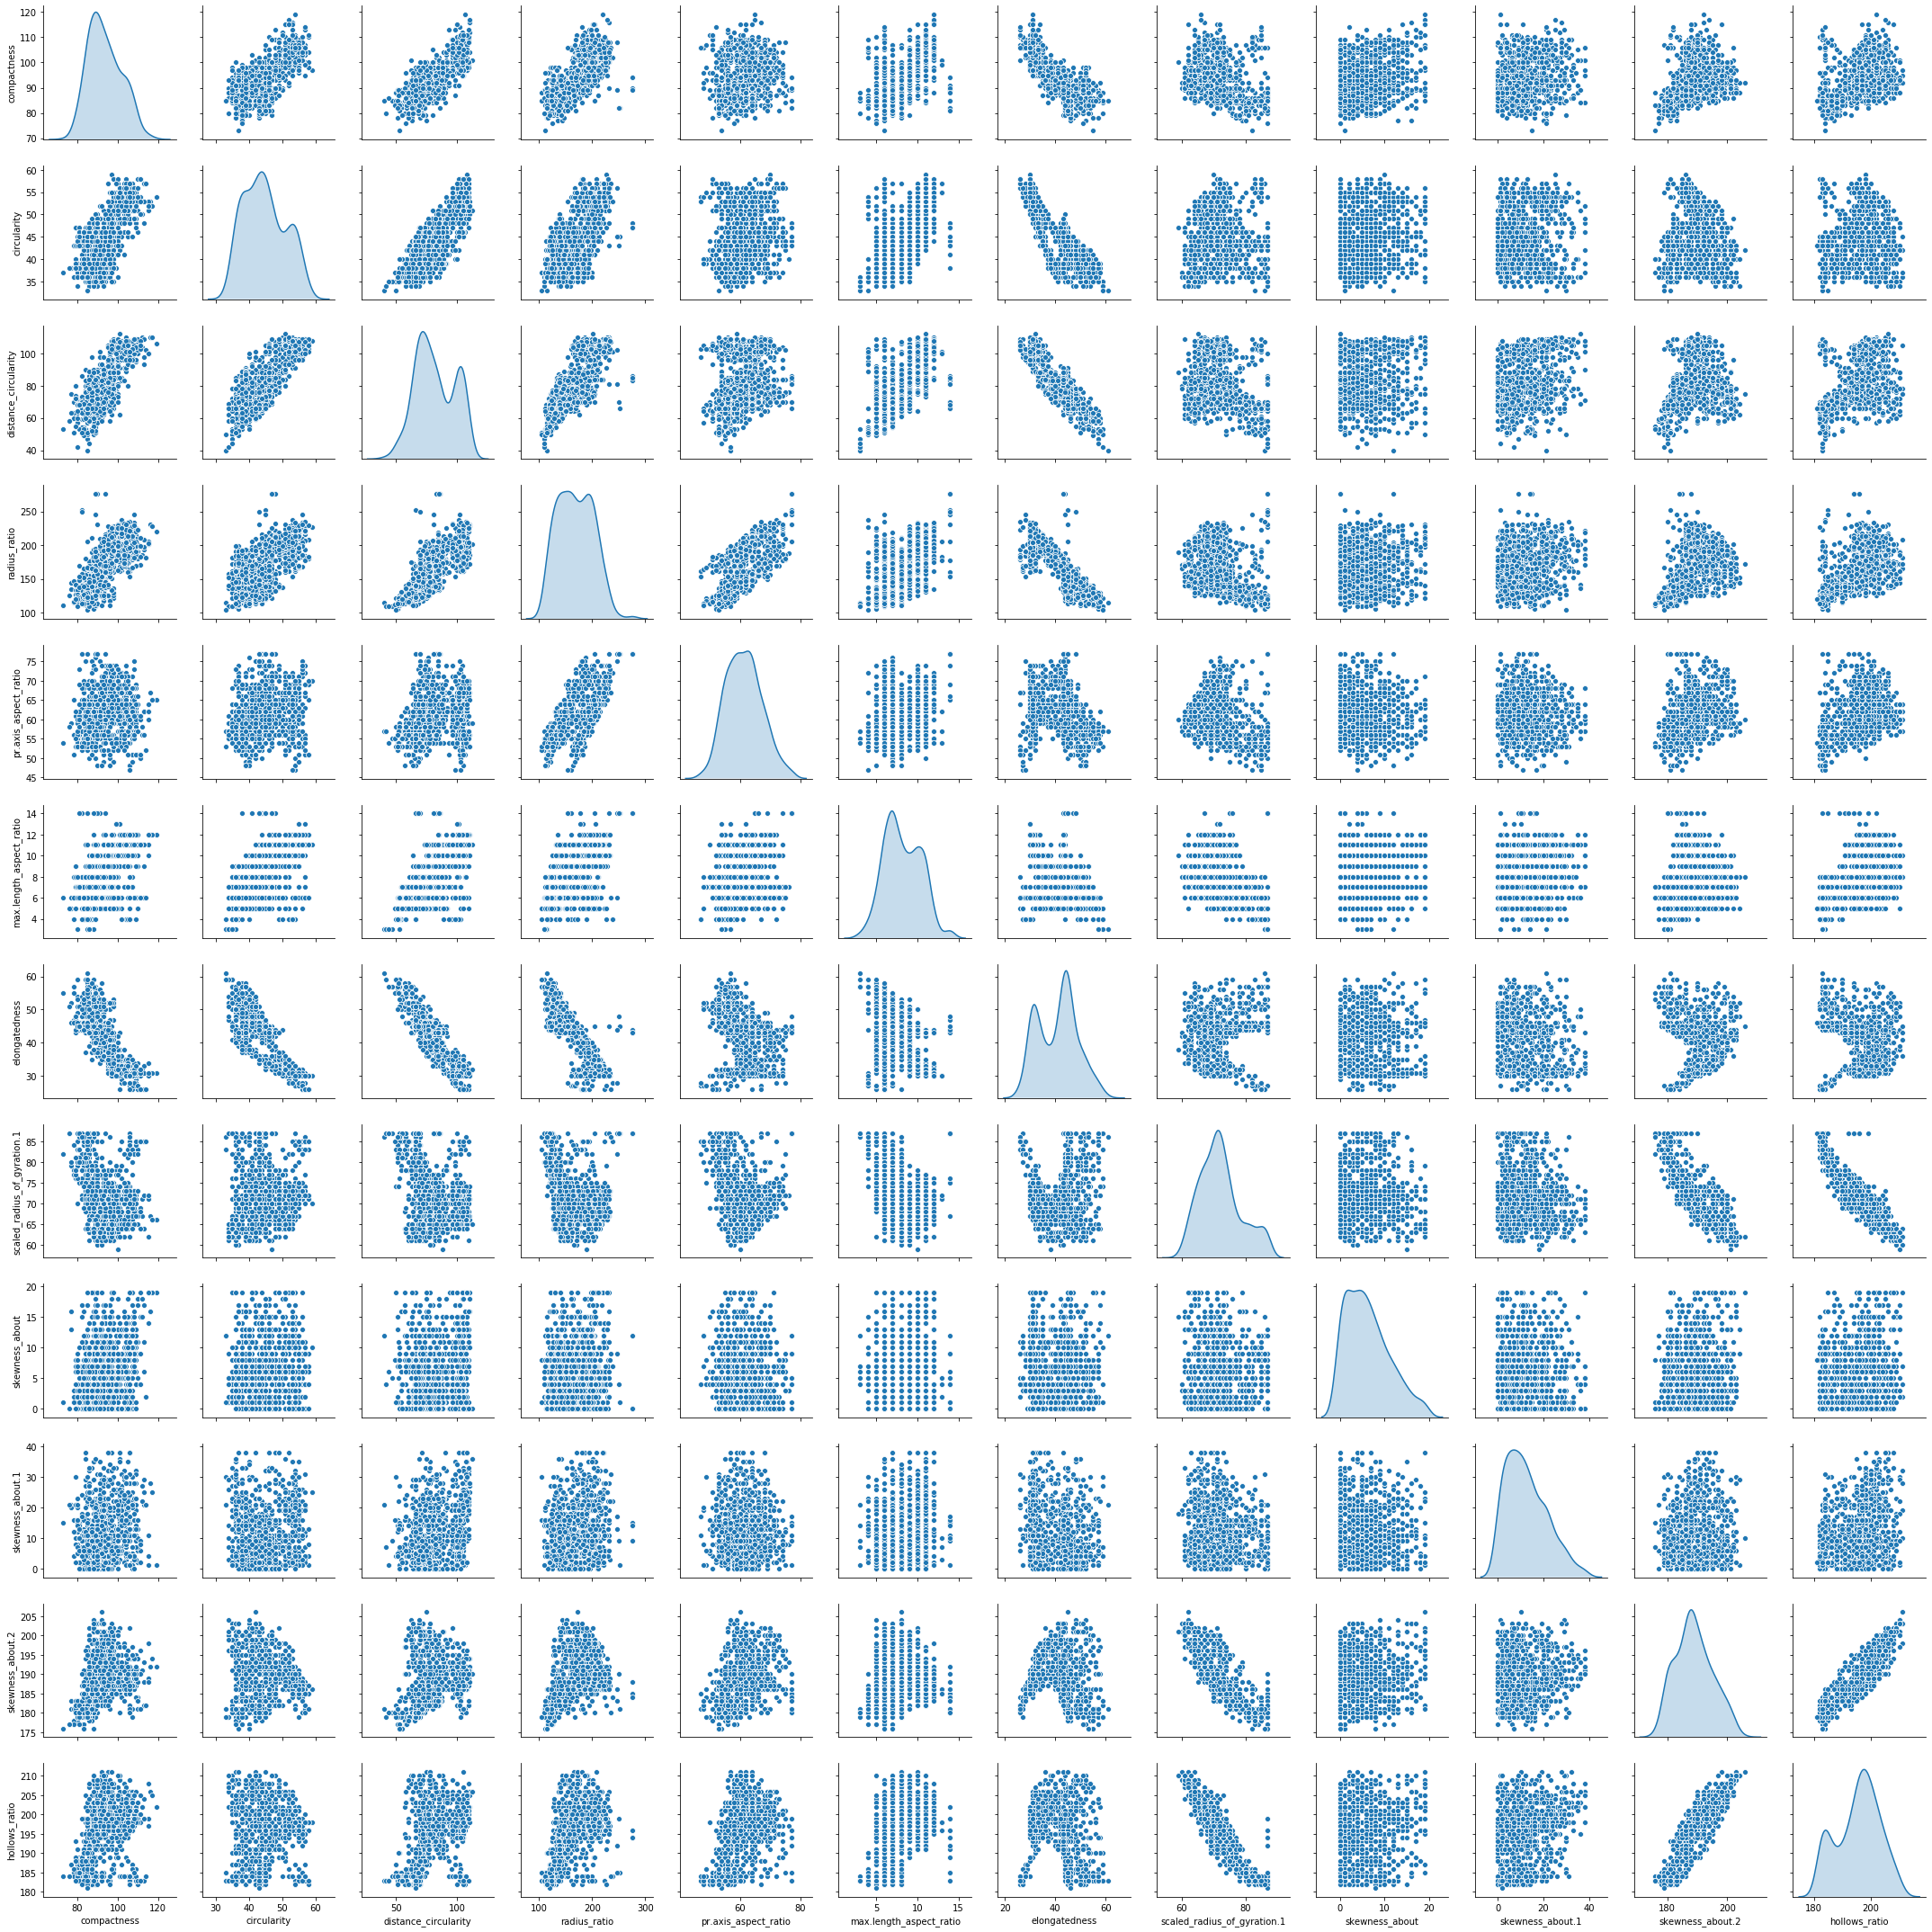

In [474]:
sns.pairplot(vehicleX1, diag_kind = 'kde')

## 3.Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance)

In [475]:
#Standardizing
vehicleXscaled = vehicleX1.apply(zscore)

In [476]:
# Create covariance matrix
cov_matrix = np.cov(vehicleXscaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153  0.69073497  0.79092746  0.70377796  0.16788275  0.45629273
  -0.78902127 -0.2752691   0.22854869  0.16858594  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.63492543  0.20053277  0.53490255
  -0.8261242   0.05333274  0.1421863  -0.00153564 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.78661123  0.2370389   0.62774698
  -0.9138366  -0.26354646  0.10943936  0.27835453  0.14543699  0.34365085]
 [ 0.70377796  0.63492543  0.78661123  1.00123153  0.68697896  0.50110224
  -0.81368373 -0.32850547  0.04451156  0.1822188   0.3858339   0.48124398]
 [ 0.16788275  0.20053277  0.2370389   0.68697896  1.00123153  0.22235369
  -0.28885565 -0.23190925 -0.05844364 -0.03834145  0.35927526  0.38045507]
 [ 0.45629273  0.53490255  0.62774698  0.50110224  0.22235369  1.00123153
  -0.47523115 -0.26202191  0.0897001   0.13016131  0.05328467  0.37568904]
 [-0.78902127 -0.8261242  -0.9138366  -0.81368373 -0.28885565 -0.47523115
   1.00123

In [477]:
#Get eigen values and eigen vector
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 3.65401222e-01 -1.25497320e-01 -1.99623843e-01  7.41417390e-02
   3.40161905e-01 -9.37072236e-03 -7.43073734e-01  7.28629287e-02
   3.40170200e-01  3.04630332e-02  1.07047349e-01 -6.33820544e-02]
 [ 3.13246550e-01 -3.66226360e-01  3.98725492e-03  1.52077656e-01
   7.03705385e-02  1.08763630e-01  3.48093258e-01  7.50822382e-01
   9.75534069e-02 -6.61073406e-02 -1.56229396e-01  6.80599928e-02]
 [ 3.93216412e-01 -2.01361605e-01 -9.76431127e-02 -1.01180664e-01
   5.80939585e-02  7.80609551e-02  2.84731366e-01 -3.83308290e-01
   1.02713676e-01 -2.30293422e-01  4.31544453e-01  5.45693377e-01]
 [ 3.98590565e-01 -3.56946087e-02  2.74503592e-01  3.71848439e-03
  -7.82547811e-04 -2.36040653e-01 -6.16730079e-02 -2.61814528e-01
  -1.09799284e-01  2.19013814e-01 -6.98644771e-01  2.97139275e-01]
 [ 2.11931502e-01  1.36115062e-01  6.39022376e-01  1.36392642e-01
  -3.20309463e-01 -4.27024604e-01 -3.60515551e-02  9.61938468e-02
   2.53477897e-01 -1.16177627e-01  3.39092819e-01 -1.46191

Cumulative Variance Explained [ 43.20786652  64.40086072  74.16459467  83.04753179  89.29134878
  94.90177627  96.75588856  97.99263486  98.90738903  99.33200695
  99.72456828 100.        ]


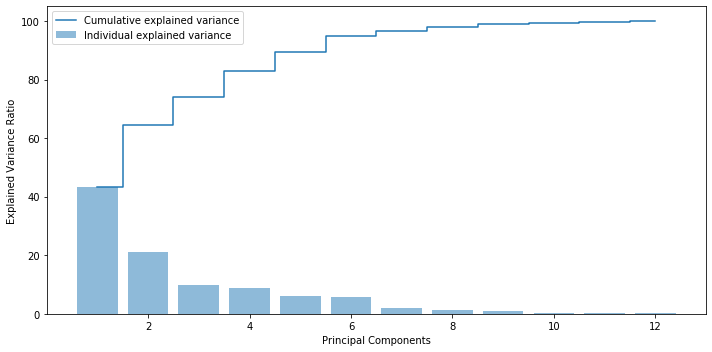

In [479]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### first 7 components covers more than 95% of variance

In [480]:
pca = PCA(n_components=7)
vehicleXreduced = pca.fit_transform(vehicleXscaled)
vehicleXreduced.transpose()

array([[-1.01660725,  0.66643442, -2.65096926, ..., -3.4129435 ,
         1.60198743,  3.51894352],
       [-0.05078987, -0.49038838,  1.20876655, ...,  1.13948389,
        -1.51884587, -0.73168872],
       [ 1.00207102, -1.10302776, -0.33883662, ...,  1.19487009,
        -0.18412601, -0.22276083],
       ...,
       [ 0.39682712, -0.39947615,  0.67479969, ..., -1.17955982,
        -0.24239935, -0.09280282],
       [ 1.23795267,  0.50552731,  0.36797871, ...,  0.20853249,
        -0.02104125, -0.47887497],
       [ 0.10026079, -0.00994505,  0.12442344, ...,  0.41621047,
        -0.23344235,  0.07711931]])

In [481]:
pca.components_

array([[-0.36540122, -0.31324655, -0.39321641, -0.39859056, -0.2119315 ,
        -0.28655199,  0.37467314,  0.22341515, -0.06850844, -0.10661851,
        -0.20834222, -0.27942132],
       [ 0.12549732,  0.36622636,  0.20136161,  0.03569461, -0.13611506,
         0.10030842, -0.25205496,  0.4855309 , -0.00773306, -0.02679648,
        -0.51726811, -0.46054627],
       [-0.19962384,  0.00398725, -0.09764311,  0.27450359,  0.63902238,
        -0.06852732, -0.03154463,  0.14077599, -0.57523209, -0.32560669,
        -0.01510054, -0.06519044],
       [-0.07414174, -0.15207766,  0.10118066, -0.00371848, -0.13639264,
         0.02419351, -0.06166784, -0.00245721, -0.58277599,  0.76912128,
        -0.07725325,  0.03135802],
       [ 0.00937072, -0.10876363, -0.07806096,  0.23604065,  0.4270246 ,
        -0.48404865, -0.0469355 ,  0.2418285 ,  0.47561158,  0.44935393,
         0.04611242, -0.13669381],
       [-0.34016191, -0.07037054, -0.05809396,  0.00078255,  0.32030946,
         0.71768792,  

## 4.Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy. 

In [482]:
X = vehicleXreduced
y = vehicle['class']

In [483]:
C = [0.01,0.05,0.5,1]
kernel = ['linear', 'rbf']
svc = svm.SVC(gamma='scale')

In [484]:
kfold = KFold(n_splits=10, random_state=7)

In [485]:
param_grid = dict(C=C,kernel=kernel)
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv = kfold, n_jobs=-1)
grid_result = grid.fit(X, y)
best_hyperparams = grid_result.best_params_

C:\Users\akhadgi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [486]:
grid_result.best_params_

{'C': 1, 'kernel': 'rbf'}

In [487]:
grid_result.best_score_

0.9114391143911439

In [488]:
grid_result.best_index_

7

In [489]:
grid.estimator

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [490]:
grid_result.estimator

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [491]:
grid_result.cv_results_

{'mean_fit_time': array([0.01508043, 0.03019929, 0.01683643, 0.02793369, 0.01602066,
        0.01695666, 0.02152634, 0.0141856 ]),
 'std_fit_time': array([0.00250589, 0.00527896, 0.00868148, 0.00556223, 0.00096816,
        0.00237112, 0.00228599, 0.00337289]),
 'mean_score_time': array([0.00187232, 0.00347197, 0.00156507, 0.00262816, 0.00170348,
        0.00203333, 0.00119038, 0.00149307]),
 'std_score_time': array([0.00070247, 0.0015207 , 0.00049272, 0.00024867, 0.00096123,
        0.00051771, 0.00032898, 0.00037772]),
 'param_C': masked_array(data=[0.01, 0.01, 0.05, 0.05, 0.5, 0.5, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0

In [492]:
result = cross_val_score(grid_result.estimator, X, y, cv = kfold, scoring='accuracy')
print(result.mean())

0.911352002408913


#### Around 91.13 % accuracy is obtained with feature selection based on correlation value of greater than 0.9. Number of features selected was 12.
#### When repeated with feature selection based on correlation value of greater than 0.7.Number of features selected was 9. In this case accuracy was found to be around 88.3 % . Please refer code snippet below.

In [493]:
columns2 = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns2[j]:
                columns2[j] = False
                
selected_features2 = vehicleX.columns[columns2]
removed_features2 = vehicleX.columns[columns2 == False]
vehicleX2 = vehicleX[selected_features2]

In [494]:
#Standardizing
vehicleXscaled = vehicleX2.apply(zscore)
# Create covariance matrix
cov_matrix = np.cov(vehicleXscaled.T)
print('Covariance Matrix \n%s', cov_matrix)
#Get eigen values and eigen vector
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Covariance Matrix 
%s [[ 1.00123153  0.69073497  0.16788275  0.45629273 -0.78902127 -0.2752691
   0.22854869  0.16858594  0.29656022]
 [ 0.69073497  1.00123153  0.20053277  0.53490255 -0.8261242   0.05333274
   0.1421863  -0.00153564 -0.1140426 ]
 [ 0.16788275  0.20053277  1.00123153  0.22235369 -0.28885565 -0.23190925
  -0.05844364 -0.03834145  0.35927526]
 [ 0.45629273  0.53490255  0.22235369  1.00123153 -0.47523115 -0.26202191
   0.0897001   0.13016131  0.05328467]
 [-0.78902127 -0.8261242  -0.28885565 -0.47523115  1.00123153  0.1220456
  -0.04632167 -0.2016986  -0.11771267]
 [-0.2752691   0.05333274 -0.23190925 -0.26202191  0.1220456   1.00123153
  -0.0953969  -0.12621581 -0.84167084]
 [ 0.22854869  0.1421863  -0.05844364  0.0897001  -0.04632167 -0.0953969
   1.00123153 -0.02424779  0.10816294]
 [ 0.16858594 -0.00153564 -0.03834145  0.13016131 -0.2016986  -0.12621581
  -0.02424779  1.00123153  0.07750748]
 [ 0.29656022 -0.1140426   0.35927526  0.05328467 -0.11771267 -0.84167084
   

#### first 6 components covers more than 95% of variance

In [495]:
pca = PCA(n_components=6)
vehicleXreduced = pca.fit_transform(vehicleXscaled)
vehicleXreduced.transpose()

X = vehicleXreduced
y = vehicle['class']

C = [0.01,0.05,0.5,1]
kernel = ['linear', 'rbf']
svc = svm.SVC(gamma='scale')

kfold = KFold(n_splits=10, random_state=7)

param_grid = dict(C=C,kernel=kernel)
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv = kfold, n_jobs=-1)

result = cross_val_score(grid.estimator, X, y, cv = kfold, scoring='accuracy')
print(result.mean())

0.8830021077988557


   compactness  circularity  pr.axis_aspect_ratio  max.length_aspect_ratio  \
0           95         48.0                  72.0                       10   
1           91         41.0                  57.0                        9   
2          104         50.0                  66.0                       10   
3           93         41.0                  63.0                        9   
4           85         44.0                  77.0                       14   

   elongatedness  scaled_radius_of_gyration.1  skewness_about  \
0           42.0                         70.0             6.0   
1           45.0                         72.0             9.0   
2           32.0                         73.0            14.0   
3           46.0                         63.0             6.0   
4           45.0                         87.0             9.0   

   skewness_about.1  skewness_about.2  
0              16.0             187.0  
1              14.0             189.0  
2               9.0 

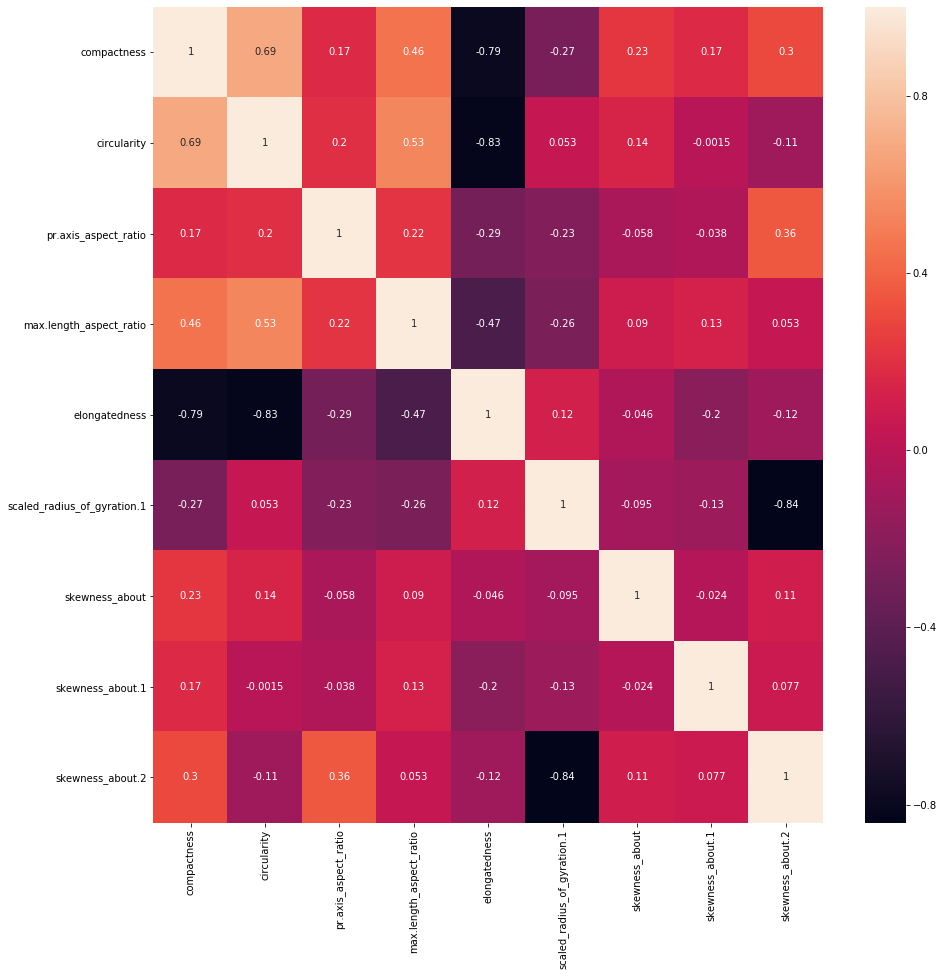

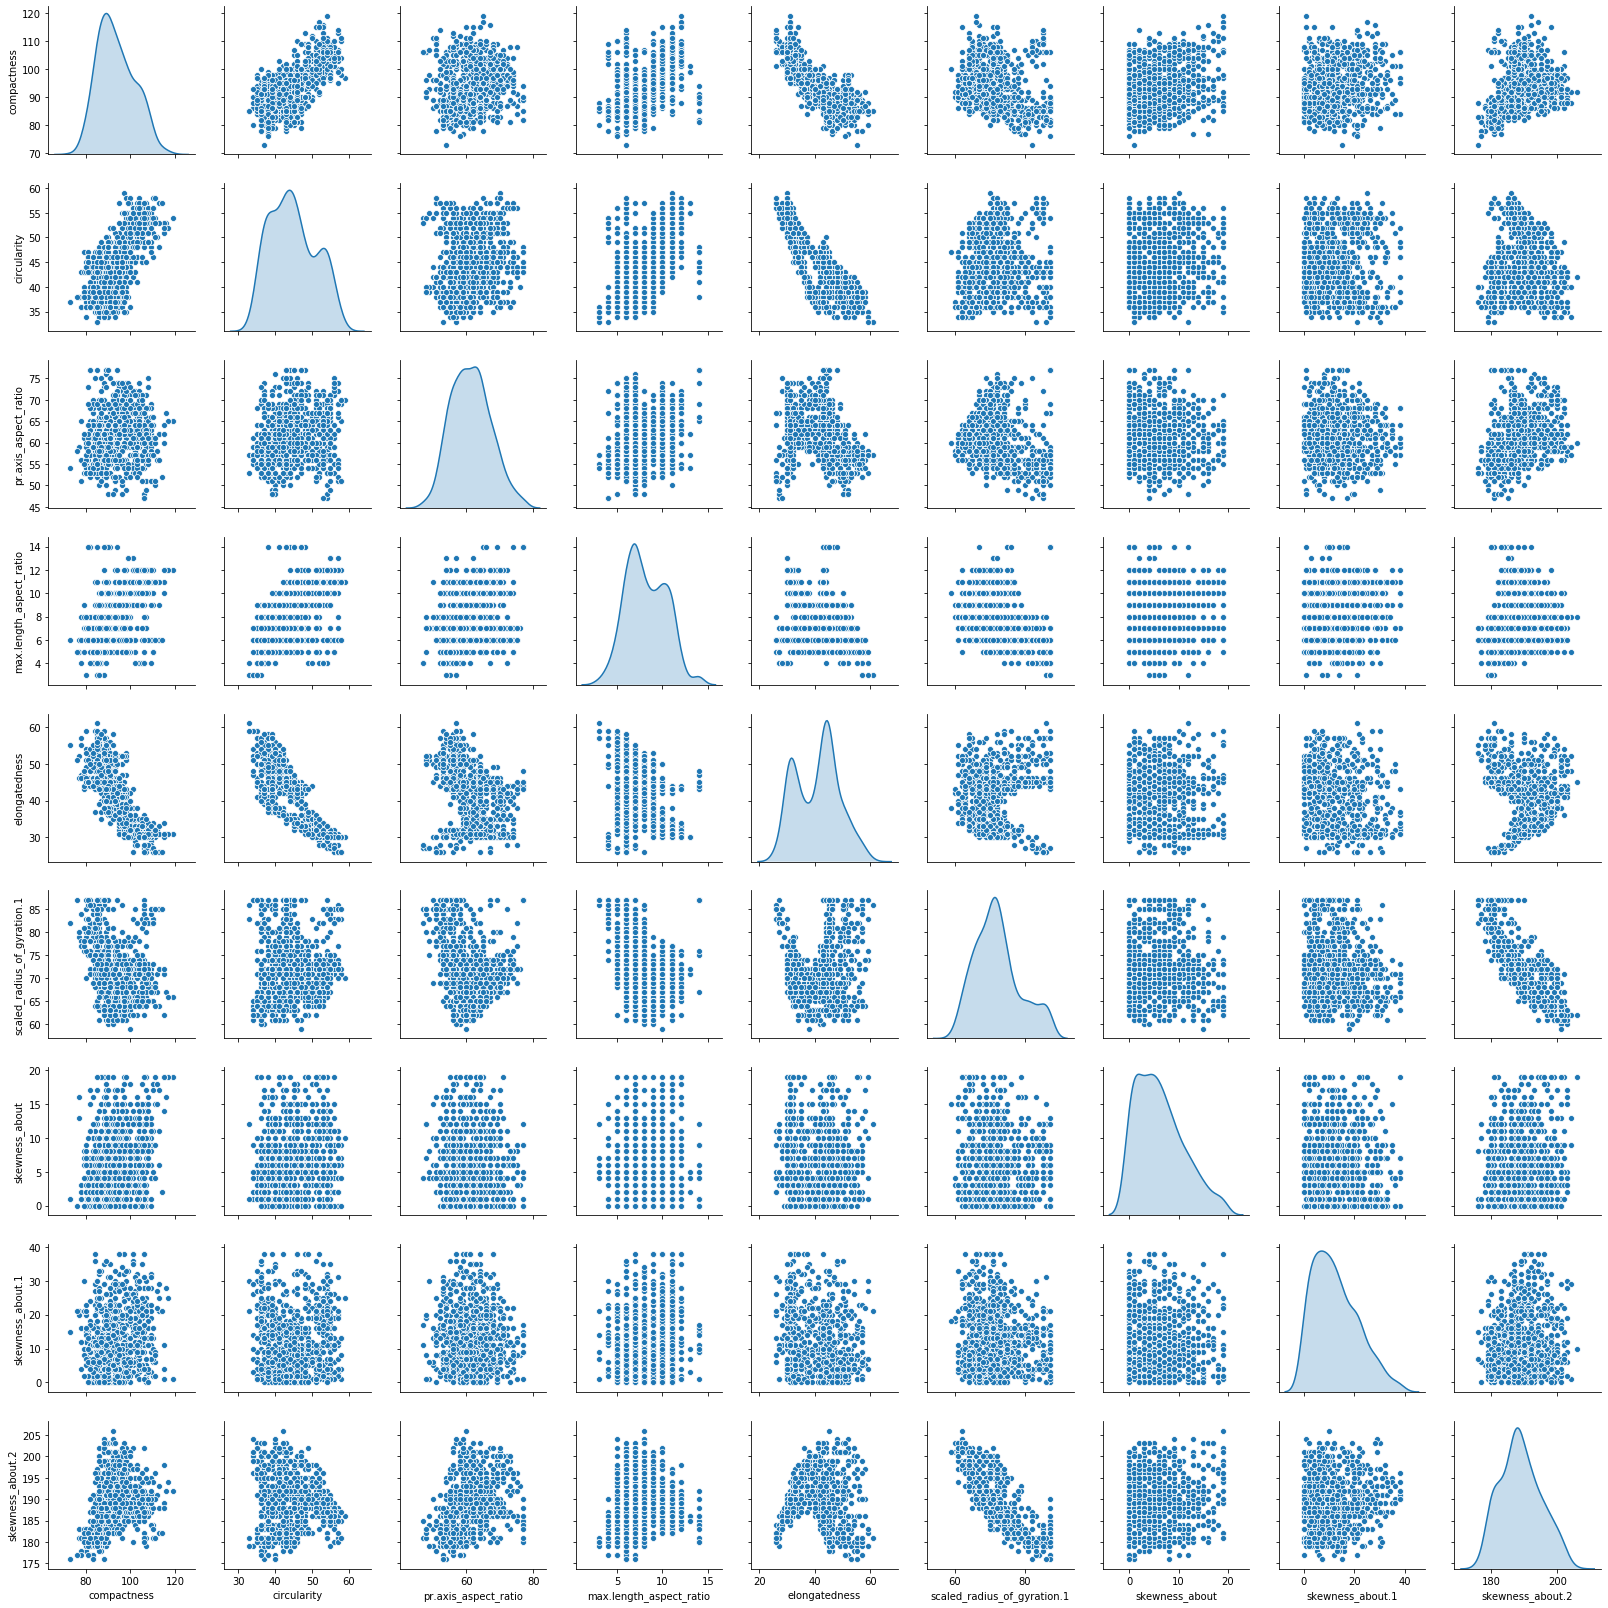

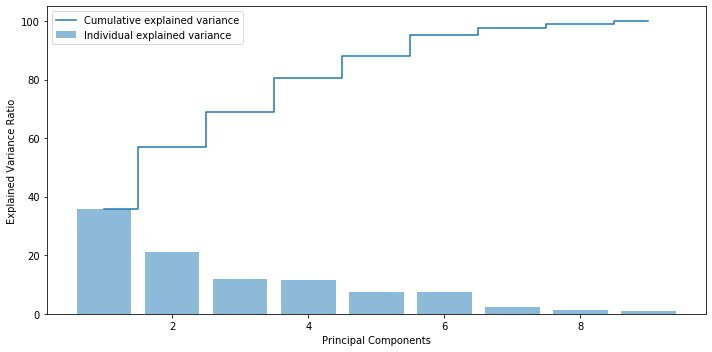

In [496]:
#Plots and Prints for reference
print(vehicleX2.head())
print('Shape of dataset with feature selection based on correlation value greater than 0.7: ')
print(vehicleX2.shape)
print('Features selected based on correlation value greater than 0.7: ')
print(selected_features2)
print('Features removed based on correlation value greater than 0.7: ')
print(removed_features2)

plt.subplots(figsize=(15,15))
sns.heatmap(vehicleX2.corr(), annot=True)
sns.pairplot(vehicleX2, diag_kind = 'kde')

# Ploting of Cumulative variance covered by Principal Components
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### So, considering 12 features (where 7 PCA components covers more than 95% of variance) gives better accuracy here and difference in accuracy is around 3% from the accuracy obtained using 9 features where 6 PCA components covers more than 95% variance.